In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# for coloring
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [3]:
df = pd.read_csv('h1b_kaggle.csv')

In [4]:
#Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [43]:
df = reduce_mem_usage(df)
df.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                  N      36067.00000  2016.0      ANN ARBOR, MICHIGAN   
1                  Y     242674.00000  2016.0             PLANO, TEXAS   
2                  Y     193066.00000  2016.0  JERSEY CITY, NEW JERSEY   
3                  Y     220314.00000  2016.0         DENVER, COLORADO   
4                  Y     157518.40625  2016.0      ST. LOUIS, MISSOURI   

   EMPLOYER_ACCEPTANCE_HA  EMPLOYER_ACCEPTANCE_LA  ...  JOB_ACCEPTANCE_HA  \
0                       1                       1  ...                  1   
1                       1                       1  ...                  1   
2                       0                       0  ...                  0   
3                       0                       0  ...                  0   
4                       0                       0  ...                  0   

   JOB_ACCEPTANCE_LA  JOB_ACCEPTANCE_MA  JOB_ACCEPTANCE_VHA  \
0                  1                  1                   1   
1                  1                  1                   1   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   JOB_ACCEPTANCE_VLA  SOC_ACCEPTANCE_HA  SOC_ACCEPTANCE_LA  \
0                   1                  1                  1   
1                   1                  1                  1   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   

   SOC_ACCEPTANCE_MA  SOC_ACCEPTANCE_VHA  SOC_ACCEPTANCE_VLA  
0                  1                   1                   1  
1                  1                   1                   1  
2                  0                   0                   0  
3                  0                   0                   0  
4                  0                   0                   0  

[5 rows x 23 columns]

In [6]:
print(df['YEAR'].unique())
print()
print(df['CASE_STATUS'].unique())
print()
print(df['EMPLOYER_NAME'].unique())
print()
print(df['SOC_NAME'].unique())
print()
print(df['JOB_TITLE'].unique())
print()

df.isnull().sum()

[2016. 2015. 2014. 2013. 2012. 2011.   nan]

['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED' 'REJECTED'
 'INVALIDATED' 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' nan]

['UNIVERSITY OF MICHIGAN' 'GOODMAN NETWORKS, INC.'
 'PORTS AMERICA GROUP, INC.' ...
 'ELEGANT SUPER STORES CORPORATE CORP (HDQTRS)' 'TELSEY CAPITAL GROUP LLC'
 'J. LOGAN INTERIORS']

['BIOCHEMISTS AND BIOPHYSICISTS' 'CHIEF EXECUTIVES' 'FINANCIAL MANAGERS'
 ... 'Tree Trimmers and Pruners'
 'Excavating and Loading Machine and Dragline Operat'
 'Earth Drillers, Except Oil and Gas']

['POSTDOCTORAL RESEARCH FELLOW' 'CHIEF OPERATING OFFICER'
 'CHIEF PROCESS OFFICER' ... 'APPRAISERS, REAL ESTATE'
 'SOFTWARE ENGINEER//DATA ARCHITECT' 'SYSWTEMS ADMINISTRATOR']



Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [7]:
print(df['WORKSITE'].isna().sum())
df.describe()

0


Unnamed: 0  PREVAILING_WAGE          YEAR           lon           lat
count  3.002458e+06     3.002373e+06  3.002445e+06  2.895216e+06  2.895216e+06
mean   1.501230e+06     1.469984e+05  2.013855e+03 -9.213441e+01  3.816054e+01
std    8.667351e+05     5.287609e+06  1.680612e+00  1.965591e+01  4.672835e+00
min    1.000000e+00     0.000000e+00  2.011000e+03 -1.578583e+02  1.343719e+01
25%    7.506152e+05     5.437100e+04  2.012000e+03 -1.119261e+02  3.416536e+01
50%    1.501230e+06     6.502100e+04  2.014000e+03 -8.615862e+01  3.910312e+01
75%    2.251844e+06     8.143200e+04  2.015000e+03 -7.551381e+01  4.088374e+01
max    3.002458e+06     6.997607e+09  2.016000e+03  1.457298e+02  6.483778e+01

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [9]:
print("The shape of the dataset is : {}".format(df.shape))
print("There were around {} applications for H-1B Visa from 2011 to 2016.".format(df.shape[0]))

The shape of the dataset is : (3002458, 11)
There were around 3002458 applications for H-1B Visa from 2011 to 2016.


## 1. Exploratory Data Analysis (EDA).

In [10]:
df.CASE_STATUS.value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

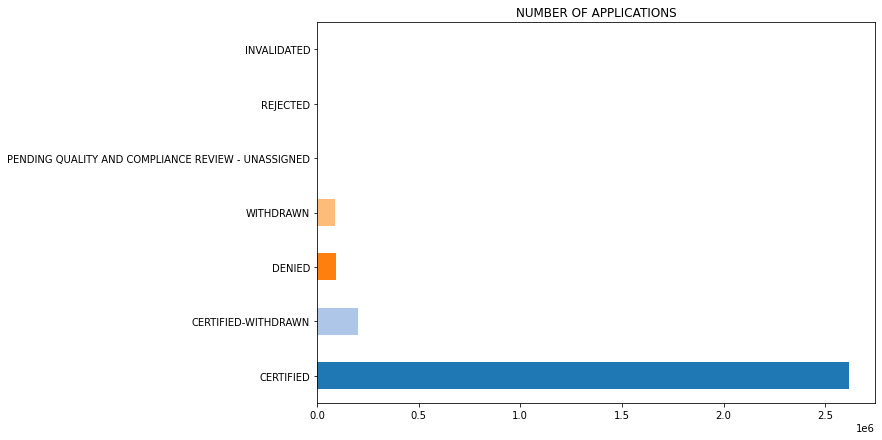

In [11]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh',  color=tableau20)
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

<AxesSubplot:>

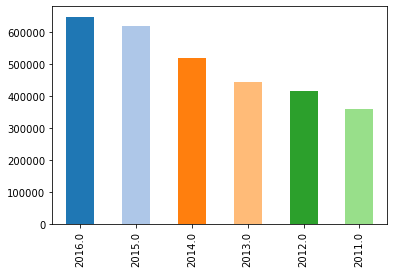

In [12]:
df.YEAR.value_counts().plot(kind = 'bar',color=tableau20)

In [13]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Analyzing more number of top 10 employees

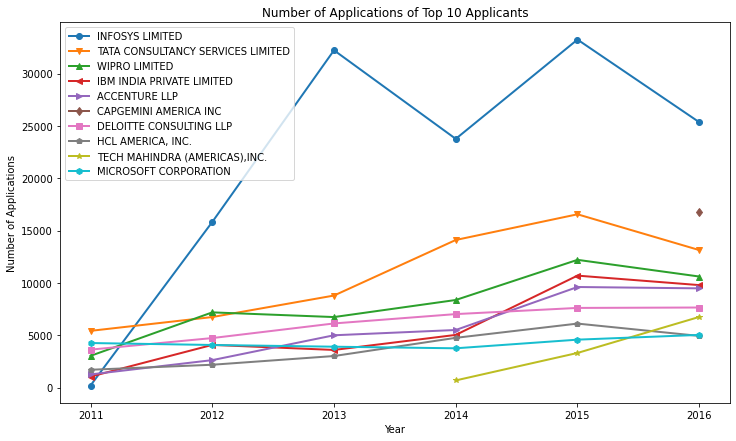

In [14]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)
byempyear = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]
byempyear = byempyear.groupby([df['EMPLOYER_NAME'], df['YEAR']])

plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d','s','p','*','h','x','D']
for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()


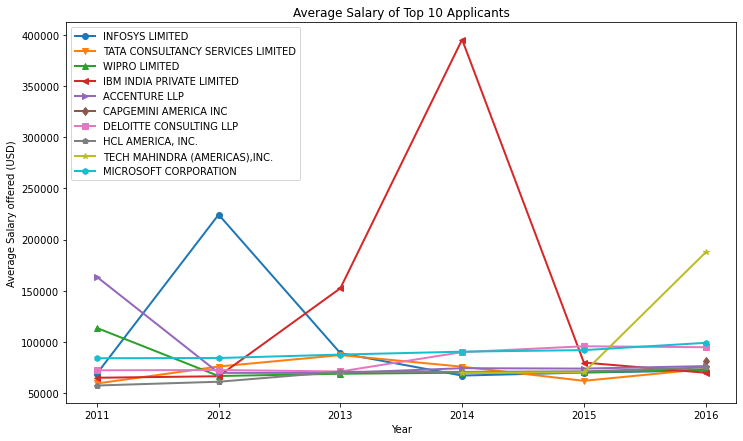

In [15]:
# average salary of each company
plt.figure(figsize=(12,7))

for company in top_emp:
    tmp = byempyear.mean().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Average Salary offered (USD)")
plt.legend()
plt.title('Average Salary of Top 10 Applicants')
plt.show()

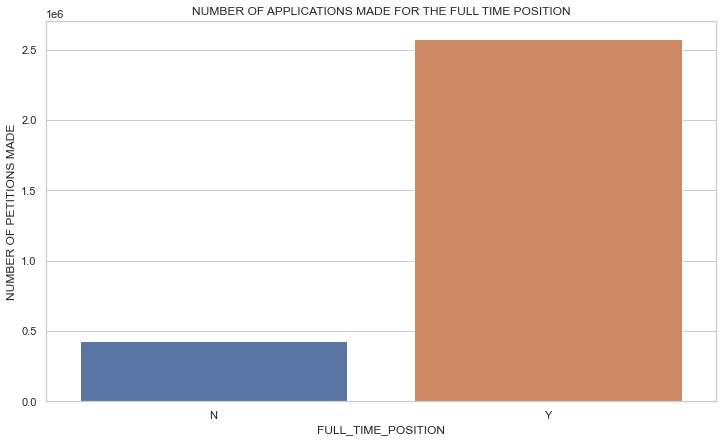

In [16]:
# full time vs half time
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

# 2. Feature Engineering 

In [17]:
df.drop(['Unnamed: 0','lon','lat'],axis=1,inplace=True)
df.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  
0                  N          36067.0  2016.0      ANN ARBOR, MICHIGAN  
1                  Y         242674.0  2016.0             PLANO, TEXAS  
2                  Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY  
3                  Y         220314.0  2016.0         DENVER, COLORADO  
4                  Y         157518.4  2016.0      ST. LOUIS, MISSOURI

<br><br><br><br>
# Checking the acceptance ratio

In [18]:
# Calculating the acceptance ratio
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"     # no data
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"     # very low acceptance
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"    # low acceptance
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"   # medium acceptance
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA" # high acceptance
    elif ratio_of_acceptance>=0.80:
        return "VHA" # very high accpetance
    
def state_extractor(work_site):
    return work_site.split(', ')[1]
# or df['STATE'] = df['WORKSITE'].map(lambda x: x.split(', ')[1])


def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"



In [19]:
#  calculation of acceptance ratio
df_1 = df.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
df_1s = df.loc[:,['SOC_NAME', 'CASE_STATUS']]
df_1j = df.loc[:,['JOB_TITLE', 'CASE_STATUS']]

df_2_C = df_1[df_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
df_2_Cs = df_1s[df_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
df_2_Cj = df_1j[df_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE

positive_counts = df_2_C.value_counts()
positive_counts_s = df_2_Cs.value_counts()
positive_counts_j = df_2_Cj.value_counts()

total_counts = df_1.EMPLOYER_NAME.value_counts()
total_counts_s = df_1s.SOC_NAME.value_counts()
total_counts_j = df_1j.JOB_TITLE.value_counts()




final_ratio_series = positive_counts / total_counts
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_j = positive_counts_j / total_counts_j

# intialising temp file
temp = pd.read_csv('h1b_kaggle.csv')

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
temp['EMPLOYER_ACCEPTANCE'] = temp.EMPLOYER_NAME.map(final_classification_employer)

final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
temp['SOC_ACCEPTANCE'] = temp.SOC_NAME.map(final_classification_soc)

final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
temp['JOB_ACCEPTANCE'] = temp.JOB_TITLE.map(final_classification_job)




# print("Case Status ",temp.CASE_STATUS.nunique())
# print("Unique Employers ",temp.EMPLOYER_ACCEPTANCE.nunique())
# print("Wages Category", temp.WAGE_CATEGORY.nunique())
# print("Unique SOCs ", temp.SOC_ACCEPTANCE.nunique())
# print("Unique Job Titles ",temp.JOB_ACCEPTANCE.nunique())
# print("Unique Filing Year ",temp.YEAR.nunique())
# print("Unique Worksite State ",temp.STATE.nunique())
# print("Unique Employment Type ", temp.FULL_TIME_POSITION.nunique())


temp.head()


Unnamed: 0          CASE_STATUS  \
0           1  CERTIFIED-WITHDRAWN   
1           2  CERTIFIED-WITHDRAWN   
2           3  CERTIFIED-WITHDRAWN   
3           4  CERTIFIED-WITHDRAWN   
4           5            WITHDRAWN   

                                       EMPLOYER_NAME  \
0                             UNIVERSITY OF MICHIGAN   
1                             GOODMAN NETWORKS, INC.   
2                          PORTS AMERICA GROUP, INC.   
3  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                  N          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                  Y         242674.0  2016.0             PLANO, TEXAS   
2                  Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                  Y         220314.0  2016.0         DENVER, COLORADO   
4                  Y         157518.4  2016.0      ST. LOUIS, MISSOURI   

          lon        lat EMPLOYER_ACCEPTANCE SOC_ACCEPTANCE JOB_ACCEPTANCE  
0  -83.743038  42.280826                  HA             HA             HA  
1  -96.698886  33.019843                  HA            VHA             HA  
2  -74.077642  40.728158                  HA            VHA             HA  
3 -104.990251  39.739236                  AR            VHA             MA  
4  -90.199404  38.627003                  HA            VHA             MA

In [20]:
# one hot coding the ratios so we could find out which company has highest ratio
temp = pd.get_dummies(temp, columns=['EMPLOYER_ACCEPTANCE','JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
temp.drop(['FULL_TIME_POSITION','CASE_STATUS','YEAR','WORKSITE','PREVAILING_WAGE'],axis=1,inplace=True)
temp.head()

Unnamed: 0                                      EMPLOYER_NAME  \
0           1                             UNIVERSITY OF MICHIGAN   
1           2                             GOODMAN NETWORKS, INC.   
2           3                          PORTS AMERICA GROUP, INC.   
3           4  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4           5                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE         lon  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW  -83.743038   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER  -96.698886   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER  -74.077642   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS -104.990251   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA  -90.199404   

         lat  EMPLOYER_ACCEPTANCE_HA  EMPLOYER_ACCEPTANCE_LA  \
0  42.280826                       1                       0   
1  33.019843                       1                       0   
2  40.728158                       1                       0   
3  39.739236                       0                       0   
4  38.627003                       1                       0   

   EMPLOYER_ACCEPTANCE_MA  EMPLOYER_ACCEPTANCE_VHA  ...  JOB_ACCEPTANCE_HA  \
0                       0                        0  ...                  1   
1                       0                        0  ...                  1   
2                       0                        0  ...                  1   
3                       0                        0  ...                  0   
4                       0                        0  ...                  0   

   JOB_ACCEPTANCE_LA  JOB_ACCEPTANCE_MA  JOB_ACCEPTANCE_VHA  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  1                   0   
4                  0                  1                   0   

   JOB_ACCEPTANCE_VLA  SOC_ACCEPTANCE_HA  SOC_ACCEPTANCE_LA  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   

   SOC_ACCEPTANCE_MA  SOC_ACCEPTANCE_VHA  SOC_ACCEPTANCE_VLA  
0                  0                   0                   0  
1                  0                   1                   0  
2                  0                   1                   0  
3                  0                   1                   0  
4                  0                   1                   0  

[5 rows x 21 columns]

In [21]:
# For  finding the top 10 companies in each field


# for creating temp matrixes
# for EMPLOYER_ACCEPTANCE
temp_1_1 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_HA']]
temp_1_2 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_LA']]
temp_1_3 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_MA']]
temp_1_4 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_VHA']]
temp_1_5 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_VLA']]
# for JOB_ACCEPTANCE
temp_2_1 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_HA']]
temp_2_2 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_LA']]
temp_2_3 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_MA']]
temp_2_4 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_VHA']]
temp_2_5 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_VLA']]
# for SOC_ACCEPTANCE
temp_3_1 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_HA']]
temp_3_2 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_LA']]
temp_3_3 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_MA']]
temp_3_4 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_VHA']]
temp_3_5 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_VLA']]


# # listing all the 
# # for EMPLOYER_ACCEPTANCE
temp__1_1 = temp_1_1[temp_1_1.EMPLOYER_ACCEPTANCE_HA == 1].EMPLOYER_NAME
temp__1_2 = temp_1_2[temp_1_2.EMPLOYER_ACCEPTANCE_LA == 1].EMPLOYER_NAME
temp__1_3 = temp_1_3[temp_1_3.EMPLOYER_ACCEPTANCE_MA == 1].EMPLOYER_NAME
temp__1_4 = temp_1_4[temp_1_4.EMPLOYER_ACCEPTANCE_VHA == 1].EMPLOYER_NAME
temp__1_5 = temp_1_5[temp_1_5.EMPLOYER_ACCEPTANCE_VLA == 1].EMPLOYER_NAME
# for JOB_ACCEPTANCE
temp__2_1 = temp_2_1[temp_2_1.JOB_ACCEPTANCE_HA == 1].JOB_TITLE
temp__2_2 = temp_2_2[temp_2_2.JOB_ACCEPTANCE_LA == 1].JOB_TITLE
temp__2_3 = temp_2_3[temp_2_3.JOB_ACCEPTANCE_MA == 1].JOB_TITLE
temp__2_4 = temp_2_4[temp_2_4.JOB_ACCEPTANCE_VHA == 1].JOB_TITLE
temp__2_5 = temp_2_5[temp_2_5.JOB_ACCEPTANCE_VLA == 1].JOB_TITLE
# for SOC_ACCEPTANCE
temp__3_1 = temp_3_1[temp_3_1.SOC_ACCEPTANCE_HA == 1].SOC_NAME
temp__3_2 = temp_3_2[temp_3_2.SOC_ACCEPTANCE_LA == 1].SOC_NAME
temp__3_3 = temp_3_3[temp_3_3.SOC_ACCEPTANCE_MA == 1].SOC_NAME
temp__3_4 = temp_3_4[temp_3_4.SOC_ACCEPTANCE_VHA == 1].SOC_NAME
temp__3_5 = temp_3_5[temp_3_5.SOC_ACCEPTANCE_VLA == 1].SOC_NAME




# for getting top 10 companies in each ratio

top_10_EMPLOYER_ACCEPTANCE_HA =  temp__1_1.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_LA =  temp__1_2.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_MA =  temp__1_3.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_VHA =  temp__1_4.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_VLA =  temp__1_5.value_counts()[:10]

top_10_JOB_ACCEPTANCE_HA =  temp__2_1.value_counts()[:10]
top_10_JOB_ACCEPTANCE_LA =  temp__2_2.value_counts()[:10]
top_10_JOB_ACCEPTANCE_MA =  temp__2_3.value_counts()[:10]
top_10_JOB_ACCEPTANCE_VHA =  temp__2_4.value_counts()[:10]
top_10_JOB_ACCEPTANCE_VLA =  temp__2_5.value_counts()[:10]

top_10_SOC_ACCEPTANCE_HA =  temp__3_1.value_counts()[:10]
top_10_SOC_ACCEPTANCE_LA =  temp__3_2.value_counts()[:10]
top_10_SOC_ACCEPTANCE_MA =  temp__3_3.value_counts()[:10]
top_10_SOC_ACCEPTANCE_VHA =  temp__3_4.value_counts()[:10]
top_10_SOC_ACCEPTANCE_VLA =  temp__3_5.value_counts()[:10]

print(top_10_SOC_ACCEPTANCE_LA)

COMPUTER OCCUPATIONS, ALL OTHER*                  626
COMPUTER SUPPORT SPECIALISTS                       76
Cooks, Restaurant                                  42
HUMAN RESOURCES, TRAINING, AND LABOR RELATIONS     37
Animal Trainers                                    28
CONSTRUCTION AND RELATED WORKERS, ALL OTHER        27
COOKS, RESTAURANT                                  26
COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE      24
Actors                                             23
TEACHERS AND INSTRUCTORS, ALL OTHER*               19
Name: SOC_NAME, dtype: int64


In [40]:
df['EMPLOYER_ACCEPTANCE_HA'] = 0
df['EMPLOYER_ACCEPTANCE_LA'] = 0
df['EMPLOYER_ACCEPTANCE_MA'] = 0
df['EMPLOYER_ACCEPTANCE_VHA'] = 0
df['EMPLOYER_ACCEPTANCE_VLA'] = 0
df['JOB_ACCEPTANCE_HA'] = 0
df['JOB_ACCEPTANCE_LA'] = 0
df['JOB_ACCEPTANCE_MA'] = 0
df['JOB_ACCEPTANCE_VHA'] = 0
df['JOB_ACCEPTANCE_VLA'] = 0
df['SOC_ACCEPTANCE_HA'] = 0
df['SOC_ACCEPTANCE_LA'] = 0
df['SOC_ACCEPTANCE_MA'] = 0
df['SOC_ACCEPTANCE_VHA'] = 0
df['SOC_ACCEPTANCE_VLA'] = 0

df.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                  N          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                  Y         242674.0  2016.0             PLANO, TEXAS   
2                  Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                  Y         220314.0  2016.0         DENVER, COLORADO   
4                  Y         157518.4  2016.0      ST. LOUIS, MISSOURI   

   EMPLOYER_ACCEPTANCE_HA  EMPLOYER_ACCEPTANCE_LA  ...  JOB_ACCEPTANCE_HA  \
0                       0                       0  ...                  0   
1                       0                       0  ...                  0   
2                       0                       0  ...                  0   
3                       0                       0  ...                  0   
4                       0                       0  ...                  0   

   JOB_ACCEPTANCE_LA  JOB_ACCEPTANCE_MA  JOB_ACCEPTANCE_VHA  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   JOB_ACCEPTANCE_VLA  SOC_ACCEPTANCE_HA  SOC_ACCEPTANCE_LA  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   

   SOC_ACCEPTANCE_MA  SOC_ACCEPTANCE_VHA  SOC_ACCEPTANCE_VLA  
0                  0                   0                   0  
1                  0                   0                   0  
2                  0                   0                   0  
3                  0                   0                   0  
4                  0                   0                   0  

[5 rows x 23 columns]

In [24]:
# Creating a exel file while where we store top comapnies with acceptance ratio

lol = top_10_EMPLOYER_ACCEPTANCE_HA
lol = lol.to_frame()

lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_HA'}, inplace=True)
print(lol)

lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_LA], axis=1)
lol.rename(columns={'EMPLOYER_NAME': 'EMPLOYER_ACCEPTANCE_LA'}, inplace=True)
lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_MA], axis=1)
lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_MA'}, inplace=True)
lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_VHA], axis=1)
lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_VHA'}, inplace=True)
lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_VLA], axis=1)
lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_VLA'}, inplace=True)
print(lol)

lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_HA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_HA'}, inplace=True)
lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_LA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_LA'}, inplace=True)
lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_MA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_MA'}, inplace=True)
lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_VHA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_VHA'}, inplace=True)
lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_VLA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_VLA'}, inplace=True)

lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_HA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_HA'}, inplace=True)
lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_LA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_LA'}, inplace=True)
lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_MA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_MA'}, inplace=True)
lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_VHA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_VHA'}, inplace=True)
lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_VLA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_VLA'}, inplace=True)


lol.head(10)

#lol.to_excel (r'D:\codes\college\pbl\trying\model\Top_10_companies_ratio.xlsx', index = True, header=True)



                                    top_10_EMPLOYER_ACCEPTANCE_HA
GOOGLE INC.                                                 16473
IBM CORPORATION                                             13276
QUALCOMM INCORPORATED                                        3965
ERICSSON INC.                                                3359
YAHOO! INC.                                                  3348
UNIVERSITY OF MICHIGAN                                       2893
BROADCOM CORPORATION                                         2862
HITACHI CONSULTING CORPORATION                               2854
CREDIT SUISSE SECURITIES (USA) LLC                           2546
NATIONAL INSTITUTES OF HEALTH, HHS                           2327
                                                 top_10_EMPLOYER_ACCEPTANCE_HA  \
GOOGLE INC.                                                            16473.0   
IBM CORPORATION                                                        13276.0   
QUALCOMM INCORPORATED       

top_10_EMPLOYER_ACCEPTANCE_HA  \
GOOGLE INC.                                               16473.0   
IBM CORPORATION                                           13276.0   
QUALCOMM INCORPORATED                                      3965.0   
ERICSSON INC.                                              3359.0   
YAHOO! INC.                                                3348.0   
UNIVERSITY OF MICHIGAN                                     2893.0   
BROADCOM CORPORATION                                       2862.0   
HITACHI CONSULTING CORPORATION                             2854.0   
CREDIT SUISSE SECURITIES (USA) LLC                         2546.0   
NATIONAL INSTITUTES OF HEALTH, HHS                         2327.0   

                                    EMPLOYER_ACCEPTANCE_LA  \
GOOGLE INC.                                            NaN   
IBM CORPORATION                                        NaN   
QUALCOMM INCORPORATED                                  NaN   
ERICSSON INC.                                          NaN   
YAHOO! INC.                                            NaN   
UNIVERSITY OF MICHIGAN                                 NaN   
BROADCOM CORPORATION                                   NaN   
HITACHI CONSULTING CORPORATION                         NaN   
CREDIT SUISSE SECURITIES (USA) LLC                     NaN   
NATIONAL INSTITUTES OF HEALTH, HHS                     NaN   

                                    top_10_EMPLOYER_ACCEPTANCE_MA  \
GOOGLE INC.                                                   NaN   
IBM CORPORATION                                               NaN   
QUALCOMM INCORPORATED                                         NaN   
ERICSSON INC.                                                 NaN   
YAHOO! INC.                                                   NaN   
UNIVERSITY OF MICHIGAN                                        NaN   
BROADCOM CORPORATION                                          NaN   
HITACHI CONSULTING CORPORATION                                NaN   
CREDIT SUISSE SECURITIES (USA) LLC                            NaN   
NATIONAL INSTITUTES OF HEALTH, HHS                            NaN   

                                    top_10_EMPLOYER_ACCEPTANCE_VHA  \
GOOGLE INC.                                                    NaN   
IBM CORPORATION                                                NaN   
QUALCOMM INCORPORATED                                          NaN   
ERICSSON INC.                                                  NaN   
YAHOO! INC.                                                    NaN   
UNIVERSITY OF MICHIGAN                                         NaN   
BROADCOM CORPORATION                                           NaN   
HITACHI CONSULTING CORPORATION                                 NaN   
CREDIT SUISSE SECURITIES (USA) LLC                             NaN   
NATIONAL INSTITUTES OF HEALTH, HHS                             NaN   

                                    top_10_EMPLOYER_ACCEPTANCE_VLA  \
GOOGLE INC.                                                    NaN   
IBM CORPORATION                                                NaN   
QUALCOMM INCORPORATED                                          NaN   
ERICSSON INC.                                                  NaN   
YAHOO! INC.                                                    NaN   
UNIVERSITY OF MICHIGAN                                         NaN   
BROADCOM CORPORATION                                           NaN   
HITACHI CONSULTING CORPORATION                                 NaN   
CREDIT SUISSE SECURITIES (USA) LLC                             NaN   
NATIONAL INSTITUTES OF HEALTH, HHS                             NaN   

                                    top_10_JOB_ACCEPTANCE_HA  \
GOOGLE INC.                                              NaN   
IBM CORPORATION                                          NaN   
QUALCOMM INCORPORATED                                    NaN   
ERICSSON INC.                      

In [32]:
df.head(20)

CASE_STATUS                                      EMPLOYER_NAME  \
0   CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1   CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2   CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3   CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4             WITHDRAWN                          PEABODY INVESTMENTS CORP.   
5   CERTIFIED-WITHDRAWN                            BURGER KING CORPORATION   
6   CERTIFIED-WITHDRAWN                   BT AND MK ENERGY AND COMMODITIES   
7   CERTIFIED-WITHDRAWN                    GLOBO MOBILE TECHNOLOGIES, INC.   
8   CERTIFIED-WITHDRAWN                                 ESI COMPANIES INC.   
9             WITHDRAWN                          LESSARD INTERNATIONAL LLC   
10  CERTIFIED-WITHDRAWN                                 H.J. HEINZ COMPANY   
11  CERTIFIED-WITHDRAWN                            DOW CORNING CORPORATION   
12  CERTIFIED-WITHDRAWN                                   ACUSHNET COMPANY   
13  CERTIFIED-WITHDRAWN                                      BIOCAIR, INC.   
14  CERTIFIED-WITHDRAWN                         NEWMONT MINING CORPORATION   
15  CERTIFIED-WITHDRAWN                                       VRICON, INC.   
16  CERTIFIED-WITHDRAWN                        CARDIAC SCIENCE CORPORATION   
17  CERTIFIED-WITHDRAWN                              WESTFIELD CORPORATION   
18            CERTIFIED                                     QUICKLOGIX LLC   
19            CERTIFIED                              MCCHRYSTAL GROUP, LLC   

                         SOC_NAME  \
0   BIOCHEMISTS AND BIOPHYSICISTS   
1                CHIEF EXECUTIVES   
2                CHIEF EXECUTIVES   
3                CHIEF EXECUTIVES   
4                CHIEF EXECUTIVES   
5                CHIEF EXECUTIVES   
6                CHIEF EXECUTIVES   
7                CHIEF EXECUTIVES   
8                CHIEF EXECUTIVES   
9                CHIEF EXECUTIVES   
10               CHIEF EXECUTIVES   
11               CHIEF EXECUTIVES   
12               CHIEF EXECUTIVES   
13               CHIEF EXECUTIVES   
14               CHIEF EXECUTIVES   
15               CHIEF EXECUTIVES   
16             FINANCIAL MANAGERS   
17               CHIEF EXECUTIVES   
18               CHIEF EXECUTIVES   
19               CHIEF EXECUTIVES   

                                            JOB_TITLE FULL_TIME_POSITION  \
0                        POSTDOCTORAL RESEARCH FELLOW                  N   
1                             CHIEF OPERATING OFFICER                  Y   
2                               CHIEF PROCESS OFFICER                  Y   
3                         REGIONAL PRESIDEN, AMERICAS                  Y   
4                        PRESIDENT MONGOLIA AND INDIA                  Y   
5   EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...                  Y   
6                             CHIEF OPERATING OFFICER                  Y   
7                            CHIEF OPERATIONS OFFICER                  Y   
8                                           PRESIDENT                  Y   
9                                           PRESIDENT                  Y   
10     CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA                  Y   
11   VICE PRESIDENT AND CHIEF HUMAN RESOURCES OFFICER                  Y   
12                                  TREASURER AND COO                  Y   
13                           CHIEF COMMERCIAL OFFICER                  Y   
14                                       BOARD MEMBER                  Y   
15                            CHIEF FINANCIAL OFFICER                  Y   
16                          VICE PRESIDENT OF FINANCE                  Y   
17                        GENERAL MANAGER, OPERATIONS                  Y   
18                                                CEO                  Y   
19                        PRESIDENT, NORTHEAST REGION                  Y   

In [42]:
# # To see if the compnay is present in the data set then give one value to the repective feature
# import sys
# import warnings
# warnings.filterwarnings("ignore")


# def insert(ratio,name,c1,c2):
#     df[ratio][df[name].str.contains(c1,c2,na=0)]=1

# x = 'EMPLOYER_NAME'
# df['EMPLOYER_ACCEPTANCE_HA'][df['EMPLOYER_NAME'].str.contains('GOOGLE INC.','IBM CORPORATION',na=0)] = 1
# insert('EMPLOYER_ACCEPTANCE_HA',x,'QUALCOMM INCORPORATED','ERICSSON INC.')
# insert('EMPLOYER_ACCEPTANCE_HA',x,'YAHOO! INC.','NATIONAL INSTITUTES OF HEALTH, HHS')
# insert('EMPLOYER_ACCEPTANCE_HA',x,'BROADCOM CORPORATION','UNIVERSITY OF MICHIGAN')
# insert('EMPLOYER_ACCEPTANCE_HA',x,'HITACHI CONSULTING CORPORATION','CREDIT SUISSE SECURITIES (USA) LLC')
# insert('EMPLOYER_ACCEPTANCE_LA',x,'EVANTAGE TECHNOLOGIES INC.','APLOMB TECHNOLOGIES, INC.')
# insert('EMPLOYER_ACCEPTANCE_LA',x,'PIKE SOLUTIONS INC','PEGASUS INFOTECH, INC.')
# insert('EMPLOYER_ACCEPTANCE_LA',x,'DIGIBLITZ TECHNOLOGIES PVT LTD','NET MATRIX SOLUTIONS, INC.')
# insert('EMPLOYER_ACCEPTANCE_LA',x,'VABSYS, INC.','MOTOROLA, INC.')
# insert('EMPLOYER_ACCEPTANCE_LA',x,'FEDERAL HOME LOAN MORTGAGE CORPORATION','MAKDI SOFTWARE SERVICES LLC')
# insert('EMPLOYER_ACCEPTANCE_MA',x,'V-SOFT CONSULTING GROUP, INC','POPULUS GROUP')
# insert('EMPLOYER_ACCEPTANCE_MA',x,'MARLABS, INC','EXILANT TECHNOLOGIES PRIVATE LIMITED')
# insert('EMPLOYER_ACCEPTANCE_MA',x,'MULTIVISION INC.','AMERICAN INFORMATION TECHNOLOGY CORPORATION')
# insert('EMPLOYER_ACCEPTANCE_MA',x,'MASSACHUSETTS INSTITUTE OF TECHNOLOGY','BATTELLE')
# insert('EMPLOYER_ACCEPTANCE_MA',x,'ADVENT GLOBAL SOLUTIONS INC.','ALINDUS, INC.')
# insert('EMPLOYER_ACCEPTANCE_VHA',x,'INFOSYS LIMITED','TATA CONSULTANCY SERVICES LIMITED')
# insert('EMPLOYER_ACCEPTANCE_VHA',x,'WIPRO LIMITED','DELOITTE CONSULTING LLP')
# insert('EMPLOYER_ACCEPTANCE_VHA',x,'IBM INDIA PRIVATE LIMITED','ACCENTURE LLP')
# insert('EMPLOYER_ACCEPTANCE_VHA',x,'MICROSOFT CORPORATION','HCL AMERICA, INC.')
# insert('EMPLOYER_ACCEPTANCE_VHA',x,'ERNST & YOUNG U.S. LLP','COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION')
# insert('EMPLOYER_ACCEPTANCE_VLA',x,'SLRI SOLUTIONS, LLC','IBM INIDA PRIVATE LIMITED')
# insert('EMPLOYER_ACCEPTANCE_VLA',x,'UNITED SOFTWARE SOLUTIONS INC','KAARYE TECHNOLOGIES INC')
# insert('EMPLOYER_ACCEPTANCE_VLA',x,'INTRAGLOBE INC','US MEDISYS, LLC')
# insert('EMPLOYER_ACCEPTANCE_VLA',x,'MSK TECHNOLOGIES INC','NORTHERN MARIANAS COLLEGE')
# insert('EMPLOYER_ACCEPTANCE_VLA',x,'RIZ GLOBAL TECHNOLOGIES LLC','REVOLUTION DESIGN STUDIOS, LLC')


# x = 'JOB_TITLE'
# insert('JOB_ACCEPTANCE_HA',x,'RESEARCH ASSOCIATE','PROGRAMMER/ANALYST')
# insert('JOB_ACCEPTANCE_HA',x,'POSTDOCTORAL FELLOW','POSTDOCTORAL RESEARCH ASSOCIATE')
# insert('JOB_ACCEPTANCE_HA',x,'RESEARCH FELLOW','POSTDOCTORAL ASSOCIATE')
# insert('JOB_ACCEPTANCE_HA',x,'INSTRUCTOR','POSTDOCTORAL RESEARCH FELLOW')
# insert('JOB_ACCEPTANCE_HA',x,'MARKETING MANAGER','POSTDOCTORAL RESEARCHER')
# insert('JOB_ACCEPTANCE_LA',x,'COMPUTER ANALYST AND SOFTWARE DEVELOPER','LEAD ASIC DESIGN VERIFICATION ENGINEER (ASIC DV ENGR)')
# insert('JOB_ACCEPTANCE_LA',x,'H-1B','POSTDOCTORAL ASSOCIATE/POSTDOCTORAL FELLOW')
# insert('JOB_ACCEPTANCE_LA',x,'COMPUTER PROGRAMMER, ANALYAST','LEAD JAVA SOFTWARE ENGINEER')
# insert('JOB_ACCEPTANCE_LA',x,'MEDICAL RESIDENT (PGY-1)','SYSTEMS ENGINEER/NETWORK AND COMPUTER SYSTEMS ADMINISTRATOR')
# insert('JOB_ACCEPTANCE_LA',x,'SOFTWARE DEVELOPMENT ENGINEER LEAD','PGY 1')
# insert('JOB_ACCEPTANCE_MA',x,'SOFTWARE APPLICATION ENGINEER','POST DOCTORATE RESEARCH ASSOCIATE')
# insert('JOB_ACCEPTANCE_MA',x,'SOFTWARE DESIGN ENGINEER IN TEST (SDET)','RESEARCH FELLOW / RESEARCH FELLOW')
# insert('JOB_ACCEPTANCE_MA',x,'SOFTWARE DESIGN ENGINEER (SDE)','SOFTWARE ENGINEEER')
# insert('JOB_ACCEPTANCE_MA',x,'SYSTEMS DEVELOPMENT SENIOR SPECIALIST','PROGRAMMER/ DEVELOPER')
# insert('JOB_ACCEPTANCE_MA',x,'ENGINEER-SOFTWARE','SYSTEMS DEVELOPMENT SPECIALIST')
# insert('JOB_ACCEPTANCE_VHA',x,'PROGRAMMER ANALYST','COMPUTER PROGRAMMER')
# insert('JOB_ACCEPTANCE_VHA',x,'SOFTWARE DEVELOPER','SOFTWARE ENGINEER')
# insert('JOB_ACCEPTANCE_VHA',x,'SYSTEMS ANALYST','BUSINESS ANALYST')
# insert('JOB_ACCEPTANCE_VHA',x,'COMPUTER SYSTEMS ANALYST','TECHNOLOGY LEAD - US')
# insert('JOB_ACCEPTANCE_VHA',x,'SENIOR SOFTWARE ENGINEER','TECHNOLOGY ANALYST - US')
# insert('JOB_ACCEPTANCE_VLA',x,'HOUSE STAFF  PGY ','RESIDENT PHYSICIAN III')
# insert('JOB_ACCEPTANCE_VLA',x,'TELEVISION ENGINEER','COMPUTER PROGRAMMER (ONSITE CO-ORDINATOR)')
# insert('JOB_ACCEPTANCE_VLA',x,'VISITING RESEARCH ASSOCIATE/POST DOC','RESEARCH ENGINEER AND MEMBER OF TECHNICAL STAFF')
# insert('JOB_ACCEPTANCE_VLA',x,'PRODUCTION STAGE MANAGER','DIRECTOR OF R&D-PLANT PROCESS MANAGER')


# x = 'SOC_NAME' 
# insert('SOC_ACCEPTANCE_HA',x,'Medical Scientists, Except Epidemiologists','Biochemists and Biophysicists')
# insert('SOC_ACCEPTANCE_HA',x,'Computer Software Engineers, Systems Software','Marketing Managers')
# insert('SOC_ACCEPTANCE_HA',x,'Biological Scientists, All Other','MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS')
# insert('SOC_ACCEPTANCE_HA',x,'General and Operations Managers','BIOCHEMISTS AND BIOPHYSICISTS')
# insert('SOC_ACCEPTANCE_HA',x,'BIOLOGICAL SCIENTISTS, ALL OTHER','Market Research Analysts')
# insert('SOC_ACCEPTANCE_LA',x,'COMPUTER OCCUPATIONS, ALL OTHER*','COMPUTER SUPPORT SPECIALISTS')
# insert('SOC_ACCEPTANCE_LA',x,'Cooks, Restaurant','HUMAN RESOURCES, TRAINING, AND LABOR RELATIONS')
# insert('SOC_ACCEPTANCE_LA',x,'Animal Trainers','CONSTRUCTION AND RELATED WORKERS, ALL OTHER')
# insert('SOC_ACCEPTANCE_LA',x,'COOKS, RESTAURANT','COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE')
# insert('SOC_ACCEPTANCE_LA',x,'Actors','TEACHERS AND INSTRUCTORS, ALL OTHER*')
# insert('SOC_ACCEPTANCE_MA',x,'MARKET RESEARCH ANALYSTS AND MARKETING','NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS*')
# insert('SOC_ACCEPTANCE_MA',x,'Sales Representatives, Services, All Other','Office and Administrative Support Workers, All Oth')
# insert('SOC_ACCEPTANCE_MA',x,'Artists and Related Workers, All Other','Healthcare Support Workers, All Other')
# insert('SOC_ACCEPTANCE_MA',x,'Secretaries and Administrative Assistants, Except','Farm, Ranch, and Other Agricultural Managers')
# insert('SOC_ACCEPTANCE_MA',x,'Office Clerks, General','Sound Engineering Technicians')
# insert('SOC_ACCEPTANCE_VHA',x,'Computer Systems Analysts','Computer Programmers')
# insert('SOC_ACCEPTANCE_VHA',x,'SOFTWARE DEVELOPERS, APPLICATIONS','COMPUTER SYSTEMS ANALYSTS')
# insert('SOC_ACCEPTANCE_VHA',x,'COMPUTER PROGRAMMERS','Software Developers, Applications')
# insert('SOC_ACCEPTANCE_VHA',x,'COMPUTER OCCUPATIONS, ALL OTHER','Computer Occupations, All Other')
# insert('SOC_ACCEPTANCE_VHA',x,'Software Developers, Systems Software','SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE')
# insert('SOC_ACCEPTANCE_VLA',x,'ELECTRICAL ENGINEER','Heating, Air Conditioning, and Refrigeration Mecha')
# insert('SOC_ACCEPTANCE_VLA',x,'INFORMATION AND RECORD CLERKS, ALL OTHER','Bartenders')
# insert('SOC_ACCEPTANCE_VLA',x,'Child Care Workers','Floral Designers')






# #df['JOB_ACCEPTANCE_HA'][df['JOB_TITLE'].str.contains('GO','CORPORATION')] = 1

# # df['EMPLOYER_ACCEPTANCE_HA'][df['EMPLOYER_NAME'] in x] = 1
# # df['EMPLOYER_ACCEPTANCE_LA'][df['EMPLOYER_NAME'] in top_10_EMPLOYER_ACCEPTANCE_LA] = 1
# # df['EMPLOYER_ACCEPTANCE_MA'][df['EMPLOYER_NAME'] in top_10_EMPLOYER_ACCEPTANCE_MA] = 1
# # df['EMPLOYER_ACCEPTANCE_VHA'][df['EMPLOYER_NAME'] in top_10_EMPLOYER_ACCEPTANCE_VHA] = 1
# # df['EMPLOYER_ACCEPTANCE_VLA'][df['EMPLOYER_NAME'] in top_10_EMPLOYER_ACCEPTANCE_VLA] = 1



In [47]:
df = df.dropna()
df

CASE_STATUS  \
0        CERTIFIED-WITHDRAWN   
1        CERTIFIED-WITHDRAWN   
2        CERTIFIED-WITHDRAWN   
3        CERTIFIED-WITHDRAWN   
4                  WITHDRAWN   
...                      ...   
3002440            WITHDRAWN   
3002441            WITHDRAWN   
3002442            WITHDRAWN   
3002443            WITHDRAWN   
3002444            WITHDRAWN   

                                             EMPLOYER_NAME  \
0                                   UNIVERSITY OF MICHIGAN   
1                                   GOODMAN NETWORKS, INC.   
2                                PORTS AMERICA GROUP, INC.   
3        GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                                PEABODY INVESTMENTS CORP.   
...                                                    ...   
3002440                               ORACLE AMERICA, INC.   
3002441                                 B & D DENTAL CORP.   
3002442                  MEDTECH STAFFING & SOLUTIONS, INC   
3002443                            LARSEN & TOUBRO LIMITED   
3002444                            LARSEN & TOUBRO LIMITED   

                                                  SOC_NAME  \
0                            BIOCHEMISTS AND BIOPHYSICISTS   
1                                         CHIEF EXECUTIVES   
2                                         CHIEF EXECUTIVES   
3                                         CHIEF EXECUTIVES   
4                                         CHIEF EXECUTIVES   
...                                                    ...   
3002440                  Software Developers, Applications   
3002441                               Materials Scientists   
3002442  Market Research Analysts and Marketing Special...   
3002443                Commercial and Industrial Designers   
3002444                Commercial and Industrial Designers   

                                        JOB_TITLE FULL_TIME_POSITION  \
0                    POSTDOCTORAL RESEARCH FELLOW                  N   
1                         CHIEF OPERATING OFFICER                  Y   
2                           CHIEF PROCESS OFFICER                  Y   
3                     REGIONAL PRESIDEN, AMERICAS                  Y   
4                    PRESIDENT MONGOLIA AND INDIA                  Y   
...                                           ...                ...   
3002440  SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2)                  Y   
3002441                       MATERIALS SCIENTIST                  N   
3002442                   MARKET RESEARCH ANALYST                  Y   
3002443                           DESIGN ENGINEER                  Y   
3002444                           DESIGN ENGINEER                  Y   

         PREVAILING_WAGE    YEAR                    WORKSITE  \
0           36067.000000  2016.0         ANN ARBOR, MICHIGAN   
1          242674.000000  2016.0                PLANO, TEXAS   
2          193066.000000  2016.0     JERSEY CITY, NEW JERSEY   
3          220314.000000  2016.0            DENVER, COLORADO   
4          157518.406250  2016.0         ST. LOUIS, MISSOURI   
...                  ...     ...                         ...   
3002440     64800.000000  2011.0  REDWOOD SHORES, CALIFORNIA   
3002441     70553.601562  2011.0           WEST VALLEY, UTAH   
3002442     33800.000000  2011.0                 AKRON, OHIO   
3002443     59800.000000  2011.0   CHELMSFORD, MASSACHUSETTS   
3002444     59800.000000  2011.0   CHELMSFORD, MASSACHUSETTS   

         EMPLOYER_ACCEPTANCE_HA  EMPLOYER_ACCEPTANCE_LA  ...  \
0                             1                       1  ...   
1                             1                       1  ...   
2                             0                       0  ...   
3                             0                       0  ...   
4                             0                       0  ...   
...                         ...                     ...  ...   
3002440                       0                       0  ...

In [38]:
df.EMPLOYER_ACCEPTANCE_HA.nunique()

2

In [ ]:
suppppppppppppppppp

# Label Encoding

In [48]:
# WAGE
df['WAGE_CATEGORY'] = df['PREVAILING_WAGE'].apply(wage_categorization)
df = df.drop(['PREVAILING_WAGE'], axis = 1)
df.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION    YEAR                 WORKSITE  EMPLOYER_ACCEPTANCE_HA  \
0                  N  2016.0      ANN ARBOR, MICHIGAN                       1   
1                  Y  2016.0             PLANO, TEXAS                       1   
2                  Y  2016.0  JERSEY CITY, NEW JERSEY                       0   
3                  Y  2016.0         DENVER, COLORADO                       0   
4                  Y  2016.0      ST. LOUIS, MISSOURI                       0   

   EMPLOYER_ACCEPTANCE_LA  EMPLOYER_ACCEPTANCE_MA  ...  JOB_ACCEPTANCE_LA  \
0                       1                       1  ...                  1   
1                       1                       1  ...                  1   
2                       0                       0  ...                  0   
3                       0                       0  ...                  0   
4                       0                       0  ...                  0   

   JOB_ACCEPTANCE_MA  JOB_ACCEPTANCE_VHA  JOB_ACCEPTANCE_VLA  \
0                  1                   1                   1   
1                  1                   1                   1   
2                  0                   0                   0   
3                  0                   0                   0   
4                  0                   0                   0   

   SOC_ACCEPTANCE_HA  SOC_ACCEPTANCE_LA  SOC_ACCEPTANCE_MA  \
0                  1                  1                  1   
1                  1                  1                  1   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   

   SOC_ACCEPTANCE_VHA  SOC_ACCEPTANCE_VLA  WAGE_CATEGORY  
0                   1                   1       VERY LOW  
1                   1                   1      VERY HIGH  
2                   0                   0      VERY HIGH  
3                   0                   0      VERY HIGH  
4                   0                   0      VERY HIGH  

[5 rows x 23 columns]

In [49]:
# State extractor
df['STATE'] = df['WORKSITE'].apply(state_extractor)
df = df.drop(['WORKSITE'],axis=1)
df.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION    YEAR  EMPLOYER_ACCEPTANCE_HA  EMPLOYER_ACCEPTANCE_LA  \
0                  N  2016.0                       1                       1   
1                  Y  2016.0                       1                       1   
2                  Y  2016.0                       0                       0   
3                  Y  2016.0                       0                       0   
4                  Y  2016.0                       0                       0   

   EMPLOYER_ACCEPTANCE_MA  EMPLOYER_ACCEPTANCE_VHA  ...  JOB_ACCEPTANCE_MA  \
0                       1                        1  ...                  1   
1                       1                        1  ...                  1   
2                       0                        0  ...                  0   
3                       0                        0  ...                  0   
4                       0                        0  ...                  0   

   JOB_ACCEPTANCE_VHA  JOB_ACCEPTANCE_VLA  SOC_ACCEPTANCE_HA  \
0                   1                   1                  1   
1                   1                   1                  1   
2                   0                   0                  0   
3                   0                   0                  0   
4                   0                   0                  0   

   SOC_ACCEPTANCE_LA  SOC_ACCEPTANCE_MA  SOC_ACCEPTANCE_VHA  \
0                  1                  1                   1   
1                  1                  1                   1   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   SOC_ACCEPTANCE_VLA  WAGE_CATEGORY       STATE  
0                   1       VERY LOW    MICHIGAN  
1                   1      VERY HIGH       TEXAS  
2                   0      VERY HIGH  NEW JERSEY  
3                   0      VERY HIGH    COLORADO  
4                   0      VERY HIGH    MISSOURI  

[5 rows x 23 columns]

In [50]:
df.isnull().sum()

CASE_STATUS                0
EMPLOYER_NAME              0
SOC_NAME                   0
JOB_TITLE                  0
FULL_TIME_POSITION         0
YEAR                       0
EMPLOYER_ACCEPTANCE_HA     0
EMPLOYER_ACCEPTANCE_LA     0
EMPLOYER_ACCEPTANCE_MA     0
EMPLOYER_ACCEPTANCE_VHA    0
EMPLOYER_ACCEPTANCE_VLA    0
JOB_ACCEPTANCE_HA          0
JOB_ACCEPTANCE_LA          0
JOB_ACCEPTANCE_MA          0
JOB_ACCEPTANCE_VHA         0
JOB_ACCEPTANCE_VLA         0
SOC_ACCEPTANCE_HA          0
SOC_ACCEPTANCE_LA          0
SOC_ACCEPTANCE_MA          0
SOC_ACCEPTANCE_VHA         0
SOC_ACCEPTANCE_VLA         0
WAGE_CATEGORY              0
STATE                      0
dtype: int64

In [51]:
df.CASE_STATUS.value_counts()

CERTIFIED                                             2600241
CERTIFIED-WITHDRAWN                                    201479
DENIED                                                  93761
WITHDRAWN                                               89110
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [52]:
# CASE_STATUS AND FULL_TIME_POSITION
# We remove withdrawn and certified withdrawn as they happend due to human behaviour

df = df.drop(df[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'].index)
df = df.drop(df[df['CASE_STATUS']=='WITHDRAWN'].index)

df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 1,'DENIED' : 0, 'REJECTED' : 0, 'INVALIDATED' : 0})
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head(20)

CASE_STATUS                             EMPLOYER_NAME          SOC_NAME  \
18          1.0                            QUICKLOGIX LLC  CHIEF EXECUTIVES   
19          1.0                     MCCHRYSTAL GROUP, LLC  CHIEF EXECUTIVES   
22          1.0                               LOMICS, LLC  CHIEF EXECUTIVES   
23          1.0  UC UNIVERSITY HIGH SCHOOL EDUCATION INC.  CHIEF EXECUTIVES   
25          1.0                          QUICKLOGIX, INC.  CHIEF EXECUTIVES   
27          1.0                                HELLO INC.  CHIEF EXECUTIVES   
28          1.0                                UMBEL CORP  CHIEF EXECUTIVES   
29          1.0   PERSPECTIVES OF FREEDOM FOUNDATION, INC  CHIEF EXECUTIVES   
30          1.0                                  GTH INC.  CHIEF EXECUTIVES   
31          1.0                   THE KRAFT HEINZ COMPANY  CHIEF EXECUTIVES   
32          1.0                               REGED, INC.  CHIEF EXECUTIVES   
33          1.0                    VMS COMMUNICATIONS LLC  CHIEF EXECUTIVES   
34          1.0   FINLAY EXTRACTS & INGREDIENTS USA, INC.  CHIEF EXECUTIVES   
36          1.0                             LABEL INSIGHT  CHIEF EXECUTIVES   
37          1.0                  INN AT THE WICKLIFFE LLC  CHIEF EXECUTIVES   
38          1.0                DURHAM SCHOOL SERVICES, LP  CHIEF EXECUTIVES   
39          0.0                           PARALLELS, INC.  CHIEF EXECUTIVES   
40          1.0                        CB LANSING 300 LLP  CHIEF EXECUTIVES   
41          1.0         SOFTTEK INTEGRATION SYSTEMS, INC.  CHIEF EXECUTIVES   
42          1.0                             SPARITY, INC.  CHIEF EXECUTIVES   

                                          JOB_TITLE  FULL_TIME_POSITION  \
18                                              CEO                   1   
19                      PRESIDENT, NORTHEAST REGION                   1   
22                                              CEO                   1   
23                          CHIEF FINANCIAL OFFICER                   1   
25                                              CEO                   1   
27                           CHIEF BUSINESS OFFICER                   1   
28                    VICE PRESIDENT OF ENGINEERING                   1   
29                               EXECUTIVE DIRECTOR                   1   
30             VICE PRESIDENT, BUSINESS DEVELOPMENT                   1   
31                                 HEAD OF US SALES                   1   
32                          CHIEF FINANCIAL OFFICER                   1   
33                          CHIEF OPERATING OFFICER                   1   
34                     VICE PRESIDENT OF OPERATIONS                   1   
36                          CHIEF EXECUTIVE OFFICER                   1   
37                          CHIEF EXECUTIVE OFFICER                   0   
38  VICE PRESIDENT, FINANCE AND OPERATIONS ANALYSIS                   1   
39                          CHIEF EXECUTIVE OFFICER                   1   
40                          CHIEF OPERATING OFFICER                   1   
41                                 ACCOUNT DIRECTOR                   1   
42                               TECHNICAL DIRECTOR                   1   

      YEAR  EMPLOYER_ACCEPTANCE_HA  EMPLOYER_ACCEPTANCE_LA  \
18  2016.0                       0                       0   
19  2016.0                       0                       0   
22  2016.0                       0                       0   
23  2016.0                       0                       0   
25  2016.0                       0                       0   
27  2016.0                       0                       0   
28  2016.0                       0                       0   
29  2016.0                       0                       0   
30  2016.0                       0                       0   
31  2016.0                       0                       0   
32  2016.0                       0                       0   
33  2016.0              

<AxesSubplot:>

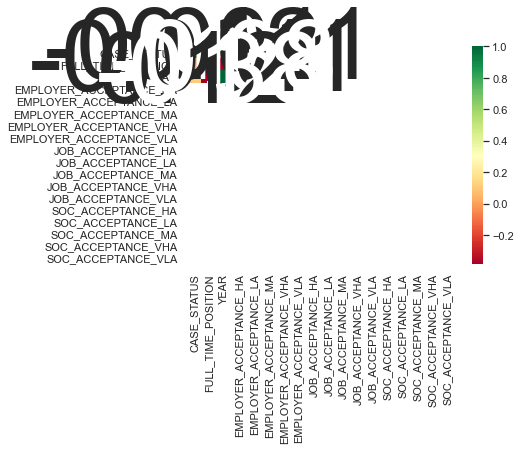

In [53]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":100})

<br><br><br><br><br><br><br><br>
# label encoding SOC_NAme then one hot encoding it 

In [54]:
# to replace all the nan values in SOC_name with 0
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])
# to make all name in caps
df['SOC_NAME'] = df['SOC_NAME'].str.upper()
df.head()

CASE_STATUS                             EMPLOYER_NAME          SOC_NAME  \
18          1.0                            QUICKLOGIX LLC  CHIEF EXECUTIVES   
19          1.0                     MCCHRYSTAL GROUP, LLC  CHIEF EXECUTIVES   
22          1.0                               LOMICS, LLC  CHIEF EXECUTIVES   
23          1.0  UC UNIVERSITY HIGH SCHOOL EDUCATION INC.  CHIEF EXECUTIVES   
25          1.0                          QUICKLOGIX, INC.  CHIEF EXECUTIVES   

                      JOB_TITLE  FULL_TIME_POSITION    YEAR  \
18                          CEO                   1  2016.0   
19  PRESIDENT, NORTHEAST REGION                   1  2016.0   
22                          CEO                   1  2016.0   
23      CHIEF FINANCIAL OFFICER                   1  2016.0   
25                          CEO                   1  2016.0   

    EMPLOYER_ACCEPTANCE_HA  EMPLOYER_ACCEPTANCE_LA  EMPLOYER_ACCEPTANCE_MA  \
18                       0                       0                       0   
19                       0                       0                       0   
22                       0                       0                       0   
23                       0                       0                       0   
25                       0                       0                       0   

    EMPLOYER_ACCEPTANCE_VHA  ...  JOB_ACCEPTANCE_MA  JOB_ACCEPTANCE_VHA  \
18                        0  ...                  0                   0   
19                        0  ...                  0                   0   
22                        0  ...                  0                   0   
23                        0  ...                  0                   0   
25                        0  ...                  0                   0   

    JOB_ACCEPTANCE_VLA  SOC_ACCEPTANCE_HA  SOC_ACCEPTANCE_LA  \
18                   0                  0                  0   
19                   0                  0                  0   
22                   0                  0                  0   
23                   0                  0                  0   
25                   0                  0                  0   

    SOC_ACCEPTANCE_MA  SOC_ACCEPTANCE_VHA  SOC_ACCEPTANCE_VLA  WAGE_CATEGORY  \
18                  0                   0                   0      VERY HIGH   
19                  0                   0                   0      VERY HIGH   
22                  0                   0                   0           HIGH   
23                  0                   0                   0           HIGH   
25                  0                   0                   0      VERY HIGH   

         STATE  
18  CALIFORNIA  
19    VIRGINIA  
22  CALIFORNIA  
23  CALIFORNIA  
25  CALIFORNIA  

[5 rows x 23 columns]

In [55]:
df['SOC_NAME'].value_counts().sort_values(ascending=False).head(50)

COMPUTER SYSTEMS ANALYSTS                             469292
SOFTWARE DEVELOPERS, APPLICATIONS                     372124
COMPUTER PROGRAMMERS                                  360569
COMPUTER OCCUPATIONS, ALL OTHER                       164657
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                  75805
MANAGEMENT ANALYSTS                                    62095
ACCOUNTANTS AND AUDITORS                               49780
FINANCIAL ANALYSTS                                     46728
MECHANICAL ENGINEERS                                   39843
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS            36218
DATABASE ADMINISTRATORS                                35303
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS     34429
ELECTRONICS ENGINEERS, EXCEPT COMPUTER                 31782
PHYSICIANS AND SURGEONS, ALL OTHER                     30641
OPERATIONS RESEARCH ANALYSTS                           30328
ELECTRICAL ENGINEERS                                   30159
COMPUTER SOFTWARE ENGINE

In [56]:
import sys
import warnings
warnings.filterwarnings("ignore")

df['JOB'] = 'others'
df['JOB'][df['SOC_NAME'].str.contains('COMPUTER','SOFTWARE')] = 'It'
df['JOB'][df['SOC_NAME'].str.contains('WEB','NETWORK')] = 'It'
df['JOB'][df['SOC_NAME'].str.contains('DEVELOPERS','SYSTEM')] = 'It'
df['JOB'][df['SOC_NAME'].str.contains('CHIEF','MANAGMENT')] = 'Manager'
df['JOB'][df['SOC_NAME'].str.contains('MECHANICAL','ELECTRICAL')] = 'Engineer'
df['JOB'][df['SOC_NAME'].str.contains('CIVIL','ENGINEER')] = 'Engineer'
df['JOB'][df['SOC_NAME'].str.contains('DESIGN','GRAPHIC')] = 'Artist'
df['JOB'][df['SOC_NAME'].str.contains('UI','UX')] = 'Artist'
df['JOB'][df['SOC_NAME'].str.contains('DRAW','ART')] = 'Artist'
df['JOB'][df['SOC_NAME'].str.contains('ACCOUNTANT')] = 'Finance'
df['JOB'][df['SOC_NAME'].str.contains('DATABASE')] = 'Database'
df['JOB'][df['SOC_NAME'].str.contains('SALES','MARKET')] = 'Scm'
df['JOB'][df['SOC_NAME'].str.contains('FINANCIAL','FINANCE')] = 'Finance'
df['JOB'][df['SOC_NAME'].str.contains('PUBLIC','FUNDRASING')] = 'Pr'
df['JOB'][df['SOC_NAME'].str.contains('EDUCAION','LAW')] = 'Administrative'
df['JOB'][df['SOC_NAME'].str.contains('AUDITORS','COMPILANCE')] = 'Audit'
df['JOB'][df['SOC_NAME'].str.contains('DISTRIBUTION','LOGISTIC')] = 'Scm'
df['JOB'][df['SOC_NAME'].str.contains('RECRUITS','HUMAN')] = 'Hr'
df['JOB'][df['SOC_NAME'].str.contains('AGRICULTURE','FARM')] = 'Agri'
df['JOB'][df['SOC_NAME'].str.contains('CONSTRUCTION','ARCHITECTURAL')] = 'Estate'
df['JOB'][df['SOC_NAME'].str.contains('THERAPIST','SURGEONS')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('BIO','CHEMISTS')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('MEDICAL')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('FORENSIC','HEALTH')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('TEACHER','STATISTICIANS')] = 'Education'

df.head(50)

CASE_STATUS                                      EMPLOYER_NAME  \
18          1.0                                     QUICKLOGIX LLC   
19          1.0                              MCCHRYSTAL GROUP, LLC   
22          1.0                                        LOMICS, LLC   
23          1.0           UC UNIVERSITY HIGH SCHOOL EDUCATION INC.   
25          1.0                                   QUICKLOGIX, INC.   
27          1.0                                         HELLO INC.   
28          1.0                                         UMBEL CORP   
29          1.0            PERSPECTIVES OF FREEDOM FOUNDATION, INC   
30          1.0                                           GTH INC.   
31          1.0                            THE KRAFT HEINZ COMPANY   
32          1.0                                        REGED, INC.   
33          1.0                             VMS COMMUNICATIONS LLC   
34          1.0            FINLAY EXTRACTS & INGREDIENTS USA, INC.   
36          1.0                                      LABEL INSIGHT   
37          1.0                           INN AT THE WICKLIFFE LLC   
38          1.0                         DURHAM SCHOOL SERVICES, LP   
39          0.0                                    PARALLELS, INC.   
40          1.0                                 CB LANSING 300 LLP   
41          1.0                  SOFTTEK INTEGRATION SYSTEMS, INC.   
42          1.0                                      SPARITY, INC.   
43          1.0                              ADCONION DIRECT, INC.   
44          1.0                                  MAVENCARE US INC.   
45          1.0  THE CHICAGO ATHENAEUM: CENTER FOR ARCHITECTURE...   
46          1.0                                  MED ADVANTAGE LLC   
47          0.0                               RANCHO LA PUERTA LLC   
48          1.0                                   STRATEGISM, INC.   
49          1.0                               RANCHO LA PUERTA LLC   
50          1.0              SPRING BRANCH COMMUNITY HEALTH CENTER   
51          1.0              SPRING BRANCH COMMUNITY HEALTH CENTER   
52          1.0                           PAXTERRA SOLUTIONS, INC.   
53          1.0                                    PARALLELS, INC.   
54          1.0                                     VARIANTYX INC.   
55          1.0                        NATURAL AMERICAN FOODS INC.   
56          1.0                                   STRATEGISM, INC.   
57          1.0                        NATURAL AMERICAN FOODS INC.   
58          1.0                        PRONTO GENERAL AGENCY, LTD.   
59          1.0                             CENTRAL OCEANS USA LLC   
61          1.0                                  SENSORHOUND, INC.   
62          1.0                                 UNDER ARMOUR, INC.   
63          1.0                     MAX PLANCK FLORIDA CORPORATION   
64          1.0                     MAX PLANCK FLORIDA CORPORATION   
65          1.0                  FISERV AUTOMOTIVE SOLUTIONS, INC.   
66          1.0                                    HBN MEDIA, INC.   
67          1.0                    ADVENTIST HEALTH SYSTEM SUNBELT   
68          1.0                             CENTRAL OCEANS USA LLC   
70          1.0                        MAP HEALTH MANAGEMENT , LLC   
71          1.0                       SANTA ROSA MEMORIAL HOSPITAL   
72          1.0                                      BENEFUEL INC.   
73          1.0                              RIVIAN AUTOMOTIVE LLC   
74          1.0                               UNIVERSITY AT ALBANY   

            SOC_NAME                                        JOB_TITLE  \
18  CHIEF EXECUTIVES                                              CEO   
19  CHIEF EXECUTIVES                      PRESIDENT, NORTHEAST REGION   
22  CHIEF EXECUTIVES                                              CEO   
23  CHIEF EXECUTIVES                          CHIEF FINANCIAL OFFICER   
25  CHIEF EXECUTIVES                                              CE

In [57]:
print(df['JOB'].unique())
print(df['JOB'].value_counts())

['Manager' 'others' 'Scm' 'Pr' 'It' 'Finance' 'Audit' 'Estate' 'Medical'
 'Artist' 'Database' 'Engineer' 'Education' 'Agri']
It           1680219
others        554846
Medical       103046
Education      76997
Finance        69084
Engineer       60617
Audit          50797
Database       35359
Artist         28559
Scm            20092
Pr              7914
Manager         3775
Estate          2539
Agri             176
Name: JOB, dtype: int64


<br><br><br><br><br><br>
# Applying one hot encoding

In [ ]:
df = df.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE'], axis = 1)
df.dropna(inplace=True)
df.columns

In [ ]:
df.head()

In [ ]:
# not taking state coz we using different type of encoding on it 
# skipped coulmns coz of drop first  -  2011,VERY LOW,AR,AR,AR,agri
df = pd.get_dummies(df, columns=['YEAR','JOB','WAGE_CATEGORY' ], drop_first=True)
df.head(30)

In [ ]:
df.columns

In [ ]:
print(df['STATE'].unique().shape)                            # 53 states are there in the station
print(df['STATE'].value_counts())
# therefore we only hot encode top 14 , those not in 14 will get all 0 
top_14 = [x for x in df.STATE.value_counts().sort_values(ascending=False).head(14).index]
top_14

In [ ]:
# now to hot encode state   
for label in top_14:
    df[label] = np.where(df['STATE']==label,1,0)

temp = df[['STATE']+top_14]
# temp.shape   (2707682, 29)
# df.shape  (2707682, 46)

In [ ]:
df = pd.concat([df, temp.iloc[:,1:]], axis=1)
df = df.drop(['STATE'], axis=1)
df.head(12)

## Splitting the data into train test split

In [ ]:
df.columns

In [ ]:
x = df.drop(['CASE_STATUS'], axis=1) # Independent variables
y = df['CASE_STATUS'] # Dependent variables

In [ ]:
x.columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# 4. Model Building

<br><br><br><br>
# Applying Logistic Regression Algorithm

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

<br><br><br><br>
# Applying Decision Tree Classifier

In [ ]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_pred_dt = dtree.predict(X_test)


print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(dtree.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_pred_dt))
print(metrics.classification_report(y_test, y_pred_dt))
#print(metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))      # Parameter "average" is requred if not a binary model
#print(metrics.f1_score(y_test,y_pred))  

<br><br><br><br>
# Applying Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd =  RandomForestClassifier(n_estimators = 75 , random_state = 50)
rd.fit(X_train,y_train)

y_pred_rfs = rd.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_rfs[:10])

print(metrics.confusion_matrix(y_test,y_pred_rfs))
print(metrics.classification_report(y_test, y_pred_rfs))
#print(metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))
#print(metrics.f1_score(y_test, y_pred))# Parameter "average" is requred if not a binary model

<br><br><br><br>
# Applying Artificial Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_mlp)
print(confusion)
print(metrics.classification_report(y_test, y_pred_mlp))
#print(metrics.recall_score(y_test, y_pred))
#print(metrics.f1_score(y_test, y_pred))

In [ ]:
X_test

In [ ]:
X_test

In [ ]:
mlp.predict([[1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0, 0,0,1,0,0 ,1,0,0,0,0, 0,1,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [ ]:
accuracy_score(y_test,y_pred_mlp)

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open(' artificial_neural_networks.pkl', 'wb')

# dump information to that file
pickle.dump(mlp, file)

<br><br><br><br>
#   Applying Gaussian Naive bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaus_clf = GaussianNB()
gaus_clf.fit(X_train, y_train)

y_pred_glb = gaus_clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_glb)
print(confusion)
print(metrics.classification_report(y_test, y_pred_glb))

<br><br><br><br>
# Applying naive bayes algorithm

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler



In [ ]:
pipe  = Pipeline([("mn",MinMaxScaler()),("nb",GaussianNB())])
pipe.fit(X_train,y_train)

In [ ]:
y_pred = pipe.predict(X_test)
print(y_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))


<br><br><br><br>
# k - nearest Neighbour Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

<br><br><br><br>
# Gradiant Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test,y_test)

<br><br><br><br>
# Tuning Gradiant Boosting Classifier

In [ ]:
gb_clf_ = GradientBoostingClassifier(n_estimators = 40)
gb_clf_.fit(X_train,y_train)
gb_clf_.score(X_test,y_test)

<br><br><br><br>
# Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC

sv_clf = svc(probability=True,kernel='linear')
sv_clf.fit(X_train,y_train)
sv_clf.fit(X_test)